
#Proyek Klasifikasi Gambar: Classification Cat and Dog
link : https://www.kaggle.com/datasets/ashfakyeafi/cat-dog-images-for-classification

    Nama: Rival Moh. Wahyudi
    Email: vallwhy@students.unnes.ac.id
    ID Dicoding:  Rival Moh. Wahyudi 


#Import Library

In [172]:
#library umum
import os
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
# library image prepocessing
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

In [5]:
# library untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
tf.config.run_functions_eagerly(True) # allow operation to be executed immediately as they are called within python
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.models import load_model



#Persiapan Data

In [65]:
#ekstrak file zip dataset
shutil.unpack_archive('cat_dog.zip', 'cat_dog')

In [66]:
master_path = 'cat_dog/'

In [67]:
# membuat daftar dataset dari path image yang telah diekstrak
full_path = []
category = []
file_name = []

In [69]:
for path, subdir, files in os.walk(master_path):
    for name in files:
        print (path)
        print (subdir)
        print (name)

cat_dog/cat_dog
[]
cat.0.jpg
cat_dog/cat_dog
[]
cat.1.jpg
cat_dog/cat_dog
[]
cat.10.jpg
cat_dog/cat_dog
[]
cat.100.jpg
cat_dog/cat_dog
[]
cat.1000.jpg
cat_dog/cat_dog
[]
cat.10000.jpg
cat_dog/cat_dog
[]
cat.10001.jpg
cat_dog/cat_dog
[]
cat.10002.jpg
cat_dog/cat_dog
[]
cat.10003.jpg
cat_dog/cat_dog
[]
cat.10004.jpg
cat_dog/cat_dog
[]
cat.10005.jpg
cat_dog/cat_dog
[]
cat.10006.jpg
cat_dog/cat_dog
[]
cat.10007.jpg
cat_dog/cat_dog
[]
cat.10008.jpg
cat_dog/cat_dog
[]
cat.10009.jpg
cat_dog/cat_dog
[]
cat.1001.jpg
cat_dog/cat_dog
[]
cat.10010.jpg
cat_dog/cat_dog
[]
cat.10011.jpg
cat_dog/cat_dog
[]
cat.10012.jpg
cat_dog/cat_dog
[]
cat.10013.jpg
cat_dog/cat_dog
[]
cat.10014.jpg
cat_dog/cat_dog
[]
cat.10015.jpg
cat_dog/cat_dog
[]
cat.10016.jpg
cat_dog/cat_dog
[]
cat.10017.jpg
cat_dog/cat_dog
[]
cat.10018.jpg
cat_dog/cat_dog
[]
cat.10019.jpg
cat_dog/cat_dog
[]
cat.1002.jpg
cat_dog/cat_dog
[]
cat.10020.jpg
cat_dog/cat_dog
[]
cat.10021.jpg
cat_dog/cat_dog
[]
cat.10022.jpg
cat_dog/cat_dog
[]
cat.100

In [70]:
#perulangan untuk mengekstrak path category dan nama dari setiap image
for path, subdir, files in os.walk(master_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        category.append(name.split('.')[0])
        file_name.append(name)

In [71]:
print (full_path)
print (category)
print (file_name)

['cat_dog/cat_dog\\cat.0.jpg', 'cat_dog/cat_dog\\cat.1.jpg', 'cat_dog/cat_dog\\cat.10.jpg', 'cat_dog/cat_dog\\cat.100.jpg', 'cat_dog/cat_dog\\cat.1000.jpg', 'cat_dog/cat_dog\\cat.10000.jpg', 'cat_dog/cat_dog\\cat.10001.jpg', 'cat_dog/cat_dog\\cat.10002.jpg', 'cat_dog/cat_dog\\cat.10003.jpg', 'cat_dog/cat_dog\\cat.10004.jpg', 'cat_dog/cat_dog\\cat.10005.jpg', 'cat_dog/cat_dog\\cat.10006.jpg', 'cat_dog/cat_dog\\cat.10007.jpg', 'cat_dog/cat_dog\\cat.10008.jpg', 'cat_dog/cat_dog\\cat.10009.jpg', 'cat_dog/cat_dog\\cat.1001.jpg', 'cat_dog/cat_dog\\cat.10010.jpg', 'cat_dog/cat_dog\\cat.10011.jpg', 'cat_dog/cat_dog\\cat.10012.jpg', 'cat_dog/cat_dog\\cat.10013.jpg', 'cat_dog/cat_dog\\cat.10014.jpg', 'cat_dog/cat_dog\\cat.10015.jpg', 'cat_dog/cat_dog\\cat.10016.jpg', 'cat_dog/cat_dog\\cat.10017.jpg', 'cat_dog/cat_dog\\cat.10018.jpg', 'cat_dog/cat_dog\\cat.10019.jpg', 'cat_dog/cat_dog\\cat.1002.jpg', 'cat_dog/cat_dog\\cat.10020.jpg', 'cat_dog/cat_dog\\cat.10021.jpg', 'cat_dog/cat_dog\\cat.10022.j

In [72]:
df = pd.DataFrame({'path' : full_path, 'name' : file_name, 'label' : category })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    25000 non-null  object
 1   name    25000 non-null  object
 2   label   25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB


In [73]:
def image_resolution(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    
    return (f'{width}x{height}')

In [74]:
df['resolution'] = df['path'].apply(image_resolution)

In [75]:
df.head()

,path,name,label,resolution
0,cat_dog/cat_dog\cat.0.jpg,cat.0.jpg,cat,500x374
1,cat_dog/cat_dog\cat.1.jpg,cat.1.jpg,cat,300x280
2,cat_dog/cat_dog\cat.10.jpg,cat.10.jpg,cat,489x499
3,cat_dog/cat_dog\cat.100.jpg,cat.100.jpg,cat,403x499
4,cat_dog/cat_dog\cat.1000.jpg,cat.1000.jpg,cat,150x149


In [76]:
#distribution of data
df['label'].value_counts()

label
cat    12500
dog    12500
Name: count, dtype: int64

In [77]:
df['resolution'].value_counts()

resolution
500x374    2955
499x375    2912
375x499     261
499x333     229
374x500     227
           ... 
380x273       1
396x443       1
350x273       1
249x499       1
96x150        1
Name: count, Length: 8513, dtype: int64

#Data Augmentation
*catatan : 
        - konversi bgr ke rgb hanya berlaku pada opencv karena opencv membaca gambar dari bgr oleh karena itu harus convert ke rgb, jika format awal image sudah rgb tidak perlu ada yang diubah dalam data asli

In [105]:
# fungsi untuk merotasi gambar berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    sudut = random.randint(0, 180)
    return rotate(img, sudut)

In [106]:
# fungsi untuk merotasi gambar searah dengan jarum jam
def clockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    sudut = random.randint(0, 180)
    return rotate(img, -sudut)

In [107]:
# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    return np.flipud(img)

In [108]:
# fungsi untuk memberikanefek peningkatan kecerahan pada gambar

def  add_brightness(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    img = adjust_gamma(img, gamma=0.5, gain=1)
    return img

In [109]:
# fungsi untuk membuat blur gambar
def blur_image(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    return cv2.GaussianBlur(img, (9,9), 0)

In [110]:
# fungsi untuk menggeser gambar beberapa pixel
def sheared(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    transform = AffineTransform(shear=0.2)
    shear_image = warp(img, transform, mode="wrap")
    return shear_image

In [111]:
# fungsi untuk melakukan pergeseran melengkung pada gambar

def warp_shift(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224, 224))
    transform = AffineTransform(translation=(0, 40))
    warp_image = warp (img, transform, mode='wrap')
    return warp_image

In [112]:
#variabel transformasi yang akan menyimpan semua fungsi data augmentasi 
transformations = {
    'rotate anticlockwise': anticlockwise_rotation,
    'rotate clockwise' : clockwise_rotation,
    'warp shift':warp_shift,
    'blurring image': blur_image,
    'add brightness': add_brightness,
    'flip up down': flip_up_down,
    'shear image': sheared
}

In [113]:
master_path = 'MRI_brain/Datasest Merged 1/Datasest Merged 1/'

In [114]:
category_u = list(set(category))
print (category_u)

['glioma', 'meningioma', 'pituitary', 'notumor']


In [115]:
mri_count = {}

for mri in category_u:
    mri_count[mri] = len(os.listdir(os.path.join(master_path, mri)))

print (mri_count)

{'glioma': 3973, 'meningioma': 3290, 'pituitary': 3588, 'notumor': 2500}


In [119]:
def augmented(count, images, keyi):
    master_path1 = 'MRI_brain/Datasest Merged 1/Datasest Merged 1/'
    i = 1 # iterasi
    while i <= count:
        image = random.choice(images) # memilih image secara random dari list image yang sebelumnya

        try: 
            original_image = io.imread(image) # menampilkan gambar
            transformed_image = None
            n=0 # iterasi untuk melakukan transformasi sesuai dengan jumlah fungsi secara acak
            transformation_count = random.randint(1, len(transformations)) # memilih angka acak yang akan diterapkan dalam tranformasi image
            while n <= transformation_count:
                key = random.choice(list(transformations))
                transformed_image = transformations[key](original_image)
                n = n+1
            new_image_path = f"{os.path.join(master_path1, keyi)}/augmented_image_{i}.jpg" # menyatukan path image yang baru di augmented
            transformed_image = img_as_ubyte(transformed_image) # mengonversi gambar ke format byte dengan skala 0 sampai 255
            cv2.imwrite(new_image_path, transformed_image) # simpan gambar pada path yang telah ditentukan
            i = i+1
    
        except ValueError as e:
            print(f'could not read the {image} : {e} hence skipping it.')

In [120]:
# membuat aturan jika gambar kurang dari 4800 maka akan dilakukan augmentasi dengan sebanyak 4800 - jumlah gambar saat ini
'''for keyi in mri_count:
    if (mri_count[keyi] < 4800):
        image_to_generate = 4800 - mri_count[keyi]'''
images = []
for i in os.listdir(os.path.join(master_path, 'notumor')):
    images.append(os.path.join(master_path, 'notumor', i))
        
augmented(500, images, 'notumor')


Memeriksa hasil dari augmentasi

In [126]:
# membuat daftar dataset dari path image yang telah diekstrak
full_path = []
category = []
file_name = []

In [127]:
#perulangan untuk mengekstrak path category dan nama dari setiap image
for path, subdir, files in os.walk(path_mri):
    for name in files:
        full_path.append(os.path.join(path, name))
        category.append(path.split('\\')[-1])
        file_name.append(name)

In [128]:
df_1 = pd.DataFrame({'path' : full_path, 'name' : file_name, 'label' : category })
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13851 entries, 0 to 13850
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    13851 non-null  object
 1   name    13851 non-null  object
 2   label   13851 non-null  object
dtypes: object(3)
memory usage: 324.8+ KB


In [129]:
df_1['resolution'] = df_1['path'].apply(image_resolution)
df_1.head()

,path,name,label,resolution
0,MRI_brain/Datasest Merged 1/Datasest Merged 1\...,1000.jpg,glioma,512x512
1,MRI_brain/Datasest Merged 1/Datasest Merged 1\...,1001.jpg,glioma,512x512
2,MRI_brain/Datasest Merged 1/Datasest Merged 1\...,1002.jpg,glioma,512x512
3,MRI_brain/Datasest Merged 1/Datasest Merged 1\...,1003.jpg,glioma,512x512
4,MRI_brain/Datasest Merged 1/Datasest Merged 1\...,1004.jpg,glioma,512x512


In [130]:
df_1['label'].value_counts()

label
glioma        3973
pituitary     3588
meningioma    3290
notumor       3000
Name: count, dtype: int64

#Melakukan split data menjadi data train dan test

In [78]:
X = df['path']
y = df['label']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [80]:
display(y_test.value_counts())
display(y_train.value_counts())

label
dog    2500
cat    2500
Name: count, dtype: int64

label
dog    10000
cat    10000
Name: count, dtype: int64

In [81]:
#menyatukan ke dalam data frame masing-masing

df_tr = pd.DataFrame({'path':X_train, 'label':y_train, 'set':'train'})
df_te = pd.DataFrame({'path': X_test, 'label': y_test, 'set':'test'})
df_tr.head()

,path,label,set
20022,cat_dog/cat_dog\dog.5518.jpg,dog,train
4993,cat_dog/cat_dog\cat.3241.jpg,cat,train
24760,cat_dog/cat_dog\dog.9783.jpg,dog,train
13775,cat_dog/cat_dog\dog.11144.jpg,dog,train
20504,cat_dog/cat_dog\dog.5952.jpg,dog,train


In [82]:
#menggabungkan dataframe df_tr dan df_te pada satu dataframe
df_all = pd.concat([df_te, df_tr], ignore_index=True)

display (df_all.groupby(['set', 'label']).size())

display (df_all.sample(5))

set    label
test   cat       2500
       dog       2500
train  cat      10000
       dog      10000
dtype: int64

,path,label,set
5514,cat_dog/cat_dog\dog.10217.jpg,dog,train
7340,cat_dog/cat_dog\cat.4522.jpg,cat,train
7174,cat_dog/cat_dog\cat.1857.jpg,cat,train
15192,cat_dog/cat_dog\cat.4307.jpg,cat,train
9489,cat_dog/cat_dog\cat.6268.jpg,cat,train


In [84]:
dataset_path = 'cat_dog/cat_dog/'

dataset_final = 'dataset/'

In [85]:
os.makedirs(dataset_final, exist_ok=True)

In [86]:
for index, row in tq(df_all.iterrows()):
    file_path = row['path']

    #buat direktori dan subdirektori tujuan folder
    if os.path.exists(os.path.join(dataset_final, row['set'], row['label'])) == False:
        os.makedirs(os.path.join(dataset_final,row['set'], row['label']))
    
    #file yang akan di copy ke direktori final
    destination_file_name = file_path.split('\\')[-1]
    file_dest = os.path.join(dataset_final, row['set'], row['label'], destination_file_name)

    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path, file_dest) # copy image ke direktori dataset

0it [00:00, ?it/s]

In [87]:
# cuma ngecheck banyak file yang ada pada suatu folder apakah tetap sesuai atau tidak
test = {}
train = {}

In [91]:
category = list(set(category))
print (category)

['cat', 'dog']


In [92]:
for cat_dog in category:
    test[cat_dog] = len(os.listdir(os.path.join(dataset_final, 'test', cat_dog)))
    train[cat_dog] = len(os.listdir(os.path.join(dataset_final, 'train', cat_dog)))

In [93]:
print (train, '\n')
print (test)

{'cat': 10000, 'dog': 10000} 

{'cat': 2500, 'dog': 2500}


In [94]:
# membuat variable yang memisahkan gambar train dan test
Train_dir = 'dataset/train'
Test_dir = 'dataset/test'

In [163]:
# mencoba untuk menampilkan contoh gambar secara random
plt.figure(figsize=(22, 5))

<Figure size 2200x500 with 0 Axes>

<Figure size 2200x500 with 0 Axes>

In [164]:
image = {}

In [165]:
for i in os.listdir(Train_dir):
    image[i] = os.listdir(os.path.join(Train_dir, i))

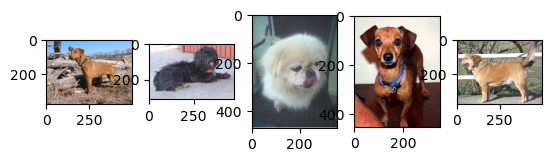

In [195]:
for i, class_name in enumerate(os.listdir(Train_dir)):
    images = np.random.choice(image[class_name], 5, replace=False) # memilih 3 gambar random dari setiap kelas atau kategori dari dict
    for j, image_name in enumerate(images):
        sb = plt.subplot(1, 5, j+1)
        img_path = os.path.join(Train_dir, class_name, image_name)
        img = Image.open(img_path)
        plt.imshow(img)

#Image Data Generator

In [138]:
# membuat objek untuk menormalisasikan gambar
datagen = ImageDataGenerator(rescale=1/255., validation_split=.2) # untuk data train dan validation
test_datagen = ImageDataGenerator(rescale=1./255) # untuk data test

In [139]:
train_generator = datagen.flow_from_directory(
    Train_dir,
    batch_size = 128,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'binary',
    subset = 'training',
    shuffle = True
)

Found 16000 images belonging to 2 classes.


In [140]:
validation_generator = datagen.flow_from_directory(
    Train_dir,
    batch_size = 128,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'binary',
    subset = 'validation',
    shuffle = True
)

Found 4000 images belonging to 2 classes.


In [141]:
test_generator = test_datagen.flow_from_directory(
    Test_dir,
    batch_size = 1,
    target_size = (150, 150),
    color_mode = 'rgb',
    class_mode = 'binary',
    shuffle = False
)

Found 5000 images belonging to 2 classes.


# Model Building

In [149]:
model = Sequential([
    Conv2D(16, (3, 3), kernel_regularizer=regularizers.l2(0.01),activation='relu', input_shape=(150,150,3)), # (3,3) --> ukuran dimesi filter yang akan memeriksa gambar dengan teknik window slide
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(32, (3, 3), kernel_regularizer=regularizers.l2(0.01),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.01),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(512, kernel_regularizer=regularizers.l2(0.01),activation='relu'),
    Dense(1, activation='sigmoid')
])

In [109]:
#learning_rates = [0.001, 0.0005, 0.0001]

In [150]:
optimizer = tf.keras.optimizers.Adam(clipvalue=1.5, learning_rate=0.001)

In [151]:
model.compile(optimizer=optimizer,
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [146]:
print (model.summary())

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 74, 74, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 36, 36, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 17, 17, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,310,689 (12.63 MB)

 Trainable params: 3,310,209 (12.63 MB)

 Non-trainable params: 480 (1.88 KB)

None


In [128]:
def step_decay_after_warmup(epoch, initial_lr = 0.01, warmup_epochs = 7, drop = 0.5,epochs_drop=10.0):
    if epoch < warmup_epochs:
        return initial_lr * (epoch+1)/warmup_epochs
    else:
        lr = initial_lr * (drop ** np.floor((epoch - warmup_epochs + 1)/ epochs_drop))
        return lr

# create callback for the learning rate scheduler
lr_scheduler = LearningRateScheduler(lambda epoch: step_decay_after_warmup(epoch, initial_lr=0.01, warmup_epochs=7, drop=0.5, epochs_drop=10))

In [152]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,  min_lr=0.0001),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    #lr_scheduler
]

In [153]:
history = model.fit(train_generator, epochs=30, batch_size=128, validation_data=validation_generator, verbose=1,callbacks=callbacks)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.6138 - loss: 8.5792 - val_accuracy: 0.5000 - val_loss: 3.8375 - learning_rate: 0.0010
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.7356 - loss: 2.5110 - val_accuracy: 0.5000 - val_loss: 2.4009 - learning_rate: 0.0010
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 254s 2s/step - accuracy: 0.7831 - loss: 1.4742 - val_accuracy: 0.5073 - val_loss: 1.8992 - learning_rate: 0.0010
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.7956 - loss: 1.1279 - val_accuracy: 0.5565 - val_loss: 1.4178 - learning_rate: 0.0010
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.8067 - loss: 0.9167 - val_accuracy: 0.6505 - val_loss: 1.1124 - learning_rate: 0.0010
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.8272 - loss: 0.7664 - val_accuracy: 0.6112 - val_loss: 1.1948 - learning_rate: 0.0010
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8326 - loss: 0.

In [154]:
model.evaluate(test_generator)

   1/5000 ━━━━━━━━━━━━━━━━━━━━ 7:28 90ms/step - accuracy: 1.0000 - loss: 0.1688

c:\Users\User\miniconda3\envs\project\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
c:\Users\User\miniconda3\envs\project\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 238s 48ms/step - accuracy: 0.9503 - loss: 0.2962


[0.3219206631183624, 0.9395999908447266]

# Plot Grafik Performa

In [155]:
# membuat grafik dari performa model pelatihan 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

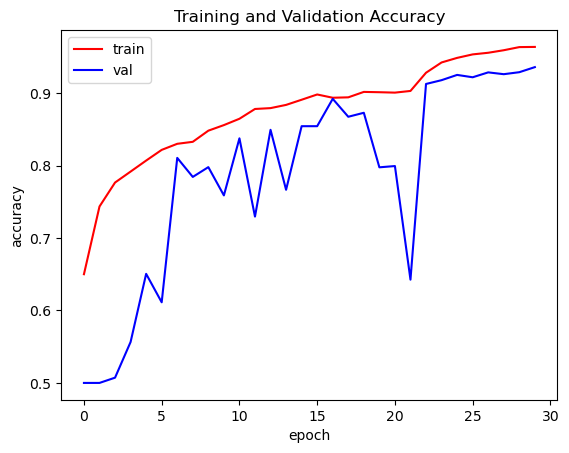

In [156]:
# grafik 1 train dan validation accuracy
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

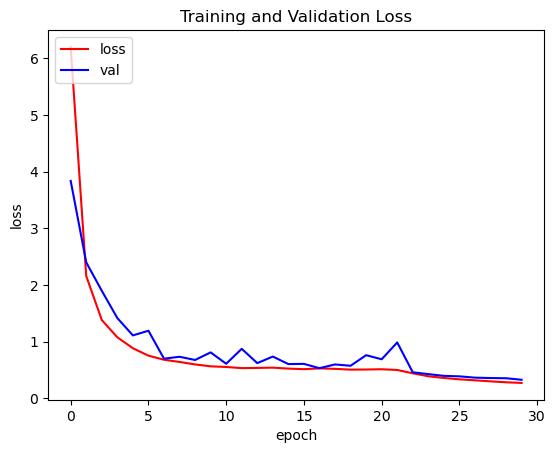

In [157]:
# grafik 2 train dan validation loss
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val'], loc='upper left')
plt.show()

# Menyimpan model untuk dapat dijadikan format lain yang dapat digunakan di berbagai Perangkat

In [158]:
model.export('saved_model_new/my_model')

INFO:tensorflow:Assets written to: saved_model_new/my_model\assets


INFO:tensorflow:Assets written to: saved_model_new/my_model\assets


Saved artifact at 'saved_model_new/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_240')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2120357410960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120357412112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120362246800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120362246608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120357411152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120357411536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120362247184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120362247760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120362246992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120362247568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2120362246416: TensorS

In [159]:
# convert model to tensorflowjs
!tensorflowjs_converter --input_format=tf_saved_model saved_model_new/my_model/ tfjs_model

Writing weight file tfjs_model\model.json...


2024-07-28 00:42:45.217304: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-28 00:42:47.542266: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

2024-07-28 00:42:57.748386: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1722102177.910286    8960 devices.cc:76] Number of eligible GPUs (core count >= 8, comp

In [160]:
# convert model to tflite

#load the keras model 
saved_model_dir = 'saved_model_new/my_model'

#convert the model to tflite 
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# save the converted model
with open('tflite/model.tflite', 'wb') as f:
    f.write(tflite_model)